In [125]:
from matplotlib import pyplot as plt, patches as mpatches
import math
from math import sin, cos, tan
import numpy as np
from numpy import sin, cos, pi, linspace
import random

Robot moved to ( 0.8520857807169222 , 0.8370903350672976 ) heading  1.5530420481154206
Robot moved to ( 4.890764127795864 , 2.951780902293698 ) heading  -0.5883293158131901
Robot moved to ( 6.102010561128008 , 4.432353190146896 ) heading  8.641754172808204
Robot moved to ( 7.792221292705877 , 3.5537155219406587 ) heading  9.249016447702946
Robot moved to ( 10.415425499153631 , 1.2105493774084972 ) heading  8.142397586949098
Robot moved to ( 9.071441073427849 , -0.1291931334098405 ) heading  -0.29157716234889364
Robot moved to ( 8.307254180480749 , -0.6419781060998927 ) heading  1.4735984689904285
Robot moved to ( 6.488860693412839 , 0.8661152260891214 ) heading  3.4248154798502477
Robot moved to ( 4.479124548887583 , 6.745973995595674 ) heading  0.37547950532100627
Robot moved to ( 5.370894239354152 , 0.4785823130737197 ) heading  3.048790104428328


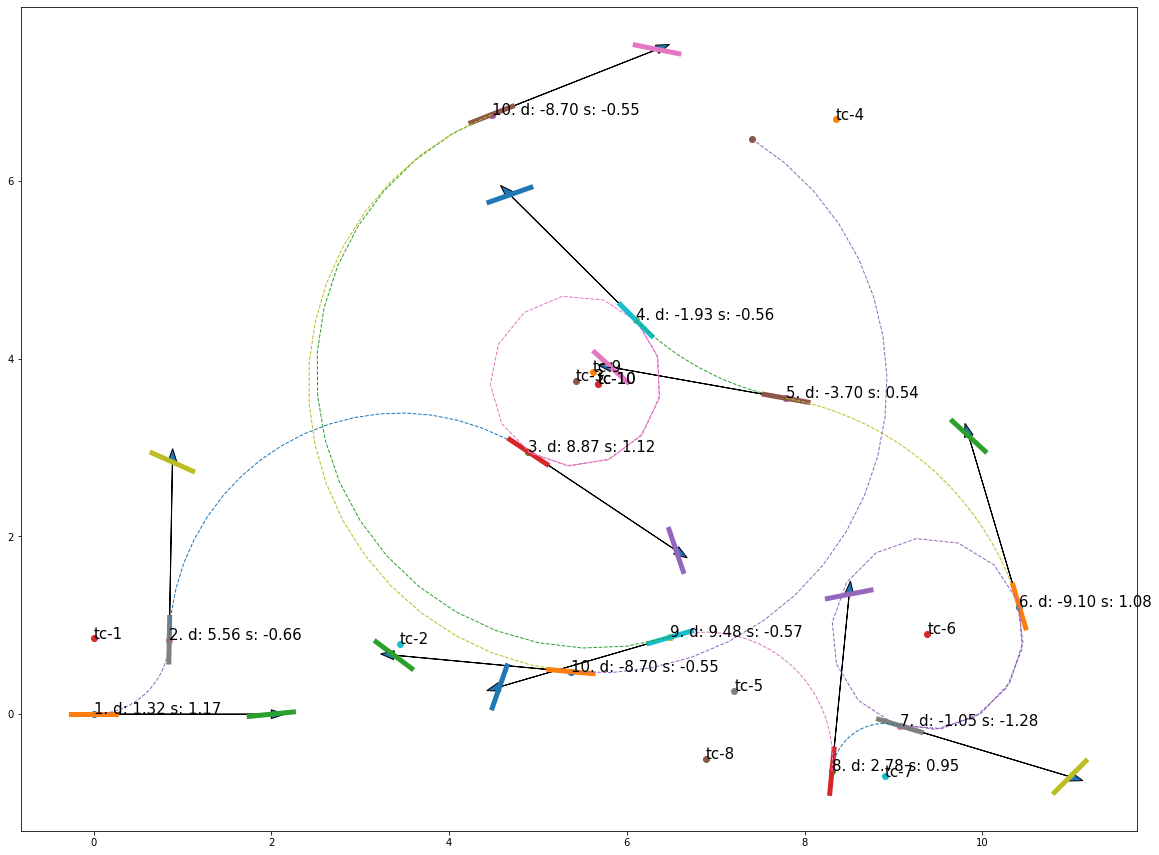

In [150]:
class Robot:
    def __init__(self, x0=0, y0=0, length=2, heading=0):
        self.x = x0
        self.y = y0
        self.length = length
        self.heading = heading
        self.steering = 0.1
        self.wheel_length = 0.5
        
    def _calc_turn_radius(self, steering):
        tan_a = tan(steering)
        if tan_a != 0:
            return self.length / tan_a
        else:
            return None
        
    def _calc_turn_center(self, turn_radius):
        if turn_radius is not None:
            return (self.x - turn_radius * sin(self.heading), self.y + turn_radius * cos(self.heading))
        else:
            return(None, None)
        
        
    def _calc_heading_after_move(self, turn_radius, distance):
        if turn_radius is not None:
            new_heading = self.heading + distance / turn_radius
            return new_heading
        else:
            return self.heading
        
        
    def _calc_position_after_move(self, turn_x, turn_y, turn_radius, new_heading):
        new_x = turn_x + turn_radius * sin(new_heading)
        new_y = turn_y - turn_radius * cos(new_heading)
        
        return (new_x, new_y)
    
    def move(self, distance, steering):
        self.steering = steering
        tr = self._calc_turn_radius(steering)
        if tr is not None:
            x_c, y_c = self._calc_turn_center(tr)
            new_heading = self._calc_heading_after_move(tr, distance)
            self.x, self.y = self._calc_position_after_move(x_c, y_c, tr, new_heading)
            self.heading = new_heading
            print('Robot moved to (', self.x, ',', self.y, ') heading ', self.heading)
        else:
            # TODO straight line
            pass
        

class RobotPlotter:
    def __init__(self, robot: Robot):
        self._robot = robot
        
    def _plot_rear_wheel(self):
        hw = self._robot.wheel_length / 2
        x = self._robot.x
        y = self._robot.y
        heading = self._robot.heading
        plt.plot((x - hw * cos(heading), x + hw * cos(heading)),
                 (y - hw * sin(heading), y + hw * sin(heading)), lw=5)
        
    def _plot_front_wheel(self):
        hw = self._robot.wheel_length / 2
        x = self._robot.x
        y = self._robot.y
        heading = self._robot.heading
        length = self._robot.length
        steering = self._robot.steering
        plt.plot((x + length * cos(heading) - hw * cos(heading + steering),
                  x + length * cos(heading) + hw * cos(heading + steering)),
                 (y + length * sin(heading) - hw * sin(heading + steering),
                  y + length * sin(heading) + hw * sin(heading + steering)), lw=5)
    
    def _plot_heading(self):
        x = self._robot.x
        y = self._robot.y
        heading = self._robot.heading
        length = self._robot.length
        plt.arrow(x, y, length * cos(heading), length * sin(heading), head_width=0.05*length, label={})
        
    def _plot_trajectory(self, x_c, y_c, tr, dist):
        arc_angles = linspace(self._robot.heading - pi/2,self._robot.heading -pi/2 + dist/tr, 20)
        arc_xs = x_c + tr * cos(arc_angles)
        arc_ys = y_c + tr * sin(arc_angles)
        plt.plot(arc_xs, arc_ys, lw = 1, linestyle="--")
        arc_angles = None
        
    def draw_robot(self, distance, steering, i):
        plt.plot(self._robot.x, self._robot.y, marker="o")
        plt.gca().annotate(f'{i}. d: {distance:.2f} s: {steering:.2f}', xy=(self._robot.x, self._robot.y), xycoords='data', fontsize=15)
        
        self._plot_rear_wheel()
        self._plot_front_wheel()
        self._plot_heading()
        
        tr = self._robot._calc_turn_radius(steering)
        x_c, y_c = self._robot._calc_turn_center(tr)
        plt.plot(x_c, y_c, marker="o")
        plt.gca().annotate(f'tc-{i}', xy=(x_c, y_c), xycoords='data', fontsize=15)
        
        nx, ny = self._robot._calc_position_after_move(x_c, y_c, tr, self._robot._calc_heading_after_move(tr, distance))
        
        self._plot_trajectory(x_c, y_c, tr, distance)
        
        plt.plot(nx, ny, marker="o")
        # plt.show()
        
bot = Robot(x0=0, y0=0, length=2, heading=0)
roboplotter = RobotPlotter(bot)

plt.figure(figsize=(20,20))
# ax_min = -5
# ax_max = 15
# plt.xlim([ax_min, ax_max])
# plt.ylim([ax_min, ax_max])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

for i in range(10):
    dist = random.uniform(-10, 10)
    steer = random.uniform(-1.4, 1.4)
    roboplotter.draw_robot(dist, steer, i+1)
    bot.move(dist, steer)
    
roboplotter.draw_robot(dist, steer, i+1)



